In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot, plot


In [195]:
orig = pd.read_csv('./LicensesDaily4.csv',sep = ';', decimal=',')
orig = orig.rename(columns={'VERBAL':'VERBAL_orig', 'BUDGET':'BUDGET_orig', 'ESTIMATED_IN':'ESTIMATED_IN_orig'})
orig['SnapDate'] = orig['SnapDate'].astype('datetime64')


bwp = pd.read_excel('./DB_EXTRACT2.xlsx',sep = ';')
bwp = bwp.rename(columns={'VERBAL':'VERBAL_bwp', 'BUDGET':'BUDGET_bwp', 'ESTIMATED_IN':'ESTIMATED_IN_bwp'})
bwp = bwp.rename(columns={'REGION':'GLOBAL_01_CODE', 'DATE':'SnapDate', 'VERBAL':'VERBAL_orig', 'BUDGET':'BUDGET_orig', 'ESTIMATED_IN':'ESTIMATED_IN_orig'})
bwp.loc[bwp.GLOBAL_01_CODE.isnull()==True, 'GLOBAL_01_CODE'] = 'NOAM'


estin = pd.read_csv('./EstIN.csv',sep = ',')
estin = estin.rename(columns={'ESTIMATED_IN':'ESTIMATED_IN_estin'})
estin['ESTIMATED_IN_estin']= estin['ESTIMATED_IN_estin'].astype('float')
estin['SnapDate'] = estin['SnapDate'].astype('datetime64[ns]')
estin['OBJECT_ID'] = estin['OBJECT_ID'].replace([np.inf, -np.inf], np.nan)
#estin['OBJECT_ID'] = estin['OBJECT_ID'].astype('int64')


WB_EstIn_est = pd.read_excel('./WB_EstIn_new.xlsx',sep = ',', decimal=',', sheetname='Est In')
WB_EstIn_wb = pd.read_excel('./WB_EstIn_new.xlsx',sep = ',', decimal=',', sheetname='WB')

In [272]:
list(orig)

['SnapDate',
 'CLOSING_QUARTER_ACTUAL',
 'GLOBAL_01_CODE',
 'ESTIMATED_IN_orig',
 'CurrentQuarter_Commit',
 'CurrentQuarterProbable',
 'CurrentQuarter_Upside',
 'CurrentQuarter_AB',
 'CurrentQuarter_CD',
 'CurrentQuarter_EF',
 'FutureQuarter_Commit',
 'FutureQuarter_Probable',
 'FutureQuarter_Upside',
 'NonExistent',
 'Count_EstIn',
 'Count_Commit',
 'Count_Probable',
 'Count_Upside',
 'Count_AB',
 'Count_CD',
 'Count_EF',
 'ACTUAL',
 'BUDGET_orig',
 'PREDICTION',
 'OppScoresForecast',
 'OpenPipe',
 'Open_AB',
 'Open_CD',
 'Open_EF',
 'Open_Commit',
 'Open_Probable',
 'Open_Upside',
 'Count_Open_AB',
 'Count_Open_CD',
 'Count_Open_EF',
 'Count_Open_Commit',
 'Count_Open_Probable',
 'Count_Open_Upside',
 'VERBAL_orig']

In [206]:
bwp.head(3)
#bwp.GLOBAL_01_CODE.unique()

,SnapDate,GLOBAL_01_CODE,YEAR_QUARTER,PROFIT_CTR,OPEN_COMMIT_VAL,OPEN_COMMIT_COUNT,OPEN_PROBABLE_VAL,OPEN_PROBABLE_COUNT,OPEN_UPSIDE_VAL,OPEN_UPSIDE_COUNT,WB_COMMIT_VAL,WB_COMMIT_COUNT,WB_PROBABLE_VAL,WB_PROBABLE_COUNT,WB_UPSIDE_VAL,WB_UPSIDE_COUNT,BUDGET_bwp,VERBAL_bwp,ESTIMATED_IN_bwp
0,2018-01-02,AP,2018-Q1,S171TEL070,6607.31508,51,79444.08041,435,288571.22244,2314,3359.11,21,34212.7,81,19634,87,123182.72378,99999.8,5938.55
1,2018-01-03,AP,2018-Q1,S171TEL070,8958.67177,60,78287.30505,426,264318.82232,2133,4103.23,23,34336.7,83,18286.6,84,110822.59822,99999.8,5782.98
2,2018-01-04,AP,2018-Q1,S171TEL070,9023.65737,61,78271.04812,427,242921.19137,2034,4081.52,24,35613.4,87,18646.5,85,110822.59822,99999.8,5895.71


In [240]:
list(bwp)

['SnapDate',
 'GLOBAL_01_CODE',
 'YEAR_QUARTER',
 'PROFIT_CTR',
 'OPEN_COMMIT_VAL',
 'OPEN_COMMIT_COUNT',
 'OPEN_PROBABLE_VAL',
 'OPEN_PROBABLE_COUNT',
 'OPEN_UPSIDE_VAL',
 'OPEN_UPSIDE_COUNT',
 'WB_COMMIT_VAL',
 'WB_COMMIT_COUNT',
 'WB_PROBABLE_VAL',
 'WB_PROBABLE_COUNT',
 'WB_UPSIDE_VAL',
 'WB_UPSIDE_COUNT',
 'BUDGET_bwp',
 'VERBAL_bwp',
 'ESTIMATED_IN_bwp']

In [239]:
list(orig)

['SnapDate',
 'CLOSING_QUARTER_ACTUAL',
 'GLOBAL_01_CODE',
 'ESTIMATED_IN_orig',
 'CurrentQuarter_Commit',
 'CurrentQuarterProbable',
 'CurrentQuarter_Upside',
 'CurrentQuarter_AB',
 'CurrentQuarter_CD',
 'CurrentQuarter_EF',
 'FutureQuarter_Commit',
 'FutureQuarter_Probable',
 'FutureQuarter_Upside',
 'NonExistent',
 'Count_EstIn',
 'Count_Commit',
 'Count_Probable',
 'Count_Upside',
 'Count_AB',
 'Count_CD',
 'Count_EF',
 'ACTUAL',
 'BUDGET_orig',
 'PREDICTION',
 'OppScoresForecast',
 'OpenPipe',
 'Open_AB',
 'Open_CD',
 'Open_EF',
 'Open_Commit',
 'Open_Probable',
 'Open_Upside',
 'Count_Open_AB',
 'Count_Open_CD',
 'Count_Open_EF',
 'Count_Open_Commit',
 'Count_Open_Probable',
 'Count_Open_Upside',
 'VERBAL_orig']

In [200]:
estin.head(4)

,SnapDate,CLOSING_QUARTER_ACTUAL,OBJECT_ID,SP_CALQUARTER_TXT,GLOBAL_01_CODE,YEAR,CW,CM_REVENUE,ESTIMATED_IN_estin,DRM_CAT,...,NonExistent,Count_EstIn,Count_Commit,Count_Probable,Count_Upside,Count_AB,Count_CD,Count_EF,Month,Quarter
0,2018-06-29,2017-Q3,1.0,2017-Q3,GEOOTH,2018.0,26.0,0.0,0.000,Booked/Won,...,0.0,0,0,0,0,0,0,0,6,2
1,2018-06-29,2017-Q3,342108.0,2017-Q3,MEE,2018.0,26.0,0.0,47.817,Booked/Won,...,0.0,1,0,0,0,0,0,0,6,2
2,2018-06-29,2017-Q3,376736.0,2017-Q3,MEE,2018.0,26.0,0.0,103.950,Booked/Won,...,0.0,1,0,0,0,0,0,0,6,2
3,2018-06-29,2017-Q3,19788510.0,2017-Q3,GEOOTH,2018.0,26.0,0.0,0.000,Booked/Won,...,0.0,0,0,0,0,0,0,0,6,2


In [116]:
print(len(WB_EstIn_wb))
print(WB_EstIn_wb.dtypes)
print(len(WB_EstIn_wb.OPP_ID.unique()))

WB_EstIn_wb.head(3)

162
SUM(ESTIMATED_IN)           float64
OPP_ID                        int64
DATE                 datetime64[ns]
REGION                       object
dtype: object
162


,SUM(ESTIMATED_IN),OPP_ID,DATE,REGION
0,3913.99621,302840198,2019-02-01,AP
1,1786.16016,303075422,2019-02-01,AP
2,1720.39121,303166693,2019-02-01,AP


In [115]:
print(len(WB_EstIn))
print(WB_EstIn.dtypes)
print(len(WB_EstIn.OPP_ID.unique()))

WB_EstIn.head(3)

206
OPP_ID                       int64
REGION                      object
DATE                datetime64[ns]
IC_DRM_CATEGORY             object
ESTIMATED_IN_SUM           float64
dtype: object
206


,OPP_ID,REGION,DATE,IC_DRM_CATEGORY,ESTIMATED_IN_SUM
0,303258076,AP,2019-02-01,Probable,19.62210
1,303209424,AP,2019-02-01,Upside,24.94335
2,303175060,AP,2019-02-01,Probable,34.71038


## We validate the data in AP

In [7]:
estin_ID_dropna = estin[(estin.GLOBAL_01_CODE=='AP') & (estin.SnapDate=='2019-02-01') & (estin.CLOSING_QUARTER_ACTUAL=='2019-Q1') 
                 & (estin.ESTIMATED_IN_estin!=0) & (estin.ESTIMATED_IN_estin.isnull()==False)].reset_index()

estin_ID_dropna['OBJECT_ID'] = estin_ID_dropna['OBJECT_ID'].astype('int64')

estin_ID_dropna.drop_duplicates(subset='OBJECT_ID', keep='last', inplace=True)

In [101]:
print(WB_EstIn_wb.shape)
WB_EstIn_wb.head()

(162, 4)


,SUM(ESTIMATED_IN),OPP_ID,DATE,REGION
0,3913.99621,302840198,2019-02-01,AP
1,1786.16016,303075422,2019-02-01,AP
2,1720.39121,303166693,2019-02-01,AP
3,1029.05865,302829485,2019-02-01,AP
4,930.32911,303112100,2019-02-01,AP


In [102]:
print(estin_ID_dropna.shape)
estin_ID_dropna.head(3)

(103, 32)


,index,SnapDate,CLOSING_QUARTER_ACTUAL,OBJECT_ID,SP_CALQUARTER_TXT,GLOBAL_01_CODE,YEAR,CW,CM_REVENUE,ESTIMATED_IN_estin,...,NonExistent,Count_EstIn,Count_Commit,Count_Probable,Count_Upside,Count_AB,Count_CD,Count_EF,Month,Quarter
0,5594709,2019-02-01,2019-Q1,301570701,2019-Q1,AP,2019.0,5.0,0.0,-7.549710,...,0.0,0,0,0,0,0,0,0,2,1
1,5594766,2019-02-01,2019-Q1,302492559,2019-Q1,AP,2019.0,5.0,0.0,38.102660,...,0.0,1,0,0,0,0,0,0,2,1
2,5594807,2019-02-01,2019-Q1,302640050,2019-Q1,AP,2019.0,5.0,0.0,101.732573,...,0.0,1,0,0,0,0,0,0,2,1


In [105]:
diff = set(estin_ID_dropna.OBJECT_ID) - set(WB_EstIn_wb.OPP_ID)
intersection = set(estin_ID_dropna.OBJECT_ID) & set(WB_EstIn_wb.OPP_ID)  

In [106]:
print(len(diff))
len(intersection)

0


103

In [107]:
est_intersection = pd.merge(estin_ID_dropna[['OBJECT_ID','SnapDate','GLOBAL_01_CODE','ESTIMATED_IN_estin']],WB_EstIn_wb, 
                            left_on=['OBJECT_ID','SnapDate','GLOBAL_01_CODE'], right_on=['OPP_ID','DATE','REGION'], how='inner')

In [108]:
est_intersection.head(2)

,OBJECT_ID,SnapDate,GLOBAL_01_CODE,ESTIMATED_IN_estin,SUM(ESTIMATED_IN),OPP_ID,DATE,REGION
0,301570701,2019-02-01,AP,-7.54971,-7.54971,301570701,2019-02-01,AP
1,302492559,2019-02-01,AP,38.10266,38.10265,302492559,2019-02-01,AP


In [111]:
different = est_intersection[abs(est_intersection.ESTIMATED_IN_estin-est_intersection['SUM(ESTIMATED_IN)'])>0.1]

## we can see the EstIN value with same OPP_ID are all equal

In [112]:
different

,OBJECT_ID,SnapDate,GLOBAL_01_CODE,ESTIMATED_IN_estin,SUM(ESTIMATED_IN),OPP_ID,DATE,REGION


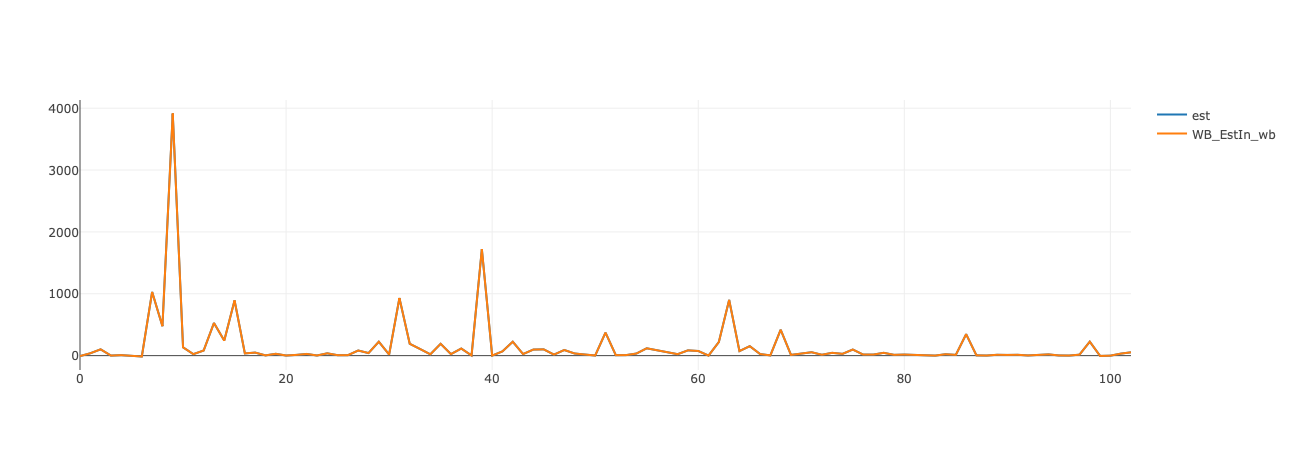

In [113]:
d1 = go.Scatter(
            x = list(range(len(est_intersection))),
            y = est_intersection.ESTIMATED_IN_estin,
            name = 'est'
            )

d2 = go.Scatter(
             x = list(range(len(est_intersection))),
            y = est_intersection['SUM(ESTIMATED_IN)'],
            name = 'WB_EstIn_wb'
            )
        

data =[d1, d2]

fig = go.Figure(data)

iplot(fig)

## <font color='red'> WB count validation </font>

## After validating the EstIN value, we will continue to validate the count

In [217]:
print(list(orig))
orig.head(3)

['SnapDate', 'CLOSING_QUARTER_ACTUAL', 'GLOBAL_01_CODE', 'ESTIMATED_IN_orig', 'CurrentQuarter_Commit', 'CurrentQuarterProbable', 'CurrentQuarter_Upside', 'CurrentQuarter_AB', 'CurrentQuarter_CD', 'CurrentQuarter_EF', 'FutureQuarter_Commit', 'FutureQuarter_Probable', 'FutureQuarter_Upside', 'NonExistent', 'Count_EstIn', 'Count_Commit', 'Count_Probable', 'Count_Upside', 'Count_AB', 'Count_CD', 'Count_EF', 'ACTUAL', 'BUDGET_orig', 'PREDICTION', 'OppScoresForecast', 'OpenPipe', 'Open_AB', 'Open_CD', 'Open_EF', 'Open_Commit', 'Open_Probable', 'Open_Upside', 'Count_Open_AB', 'Count_Open_CD', 'Count_Open_EF', 'Count_Open_Commit', 'Count_Open_Probable', 'Count_Open_Upside', 'VERBAL_orig']


,SnapDate,CLOSING_QUARTER_ACTUAL,GLOBAL_01_CODE,ESTIMATED_IN_orig,CurrentQuarter_Commit,CurrentQuarterProbable,CurrentQuarter_Upside,CurrentQuarter_AB,CurrentQuarter_CD,CurrentQuarter_EF,...,Open_Commit,Open_Probable,Open_Upside,Count_Open_AB,Count_Open_CD,Count_Open_EF,Count_Open_Commit,Count_Open_Probable,Count_Open_Upside,VERBAL_orig
0,2018-01-01,2018-Q1,NaN,0.000000,0.000000,0.000000,155.867892,0.000000,155.867892,0.000000,...,0.000000,735.071854,22412.633052,0.0,94.0,67.0,0.0,15.0,146.0,NaN
1,2018-01-01,2018-Q1,AP,1894.276016,2212.488646,22447.021428,16689.331725,4053.109925,36800.694102,495.037772,...,6505.123048,80445.386912,297190.980957,85.0,1916.0,887.0,48.0,455.0,2385.0,99999.91
2,2018-01-01,2018-Q1,EMEACLOT,112.558772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,646.182304,0.0,4.0,6.0,0.0,0.0,10.0,NaN


In [117]:
estin.head(2)

,SnapDate,CLOSING_QUARTER_ACTUAL,OBJECT_ID,SP_CALQUARTER_TXT,GLOBAL_01_CODE,YEAR,CW,CM_REVENUE,ESTIMATED_IN_estin,DRM_CAT,...,NonExistent,Count_EstIn,Count_Commit,Count_Probable,Count_Upside,Count_AB,Count_CD,Count_EF,Month,Quarter
0,2018-06-29,2017-Q3,1.0,2017-Q3,GEOOTH,2018.0,26.0,0.0,0.000,Booked/Won,...,0.0,0,0,0,0,0,0,0,6,2
1,2018-06-29,2017-Q3,342108.0,2017-Q3,MEE,2018.0,26.0,0.0,47.817,Booked/Won,...,0.0,1,0,0,0,0,0,0,6,2


In [201]:
estin_comp = estin.groupby(['SnapDate','CLOSING_QUARTER_ACTUAL','GLOBAL_01_CODE']).sum()
estin_comp_dropna = estin_comp[(estin_comp.ESTIMATED_IN_estin!=0) & (estin_comp.ESTIMATED_IN_estin.isnull()==False)].reset_index()

In [202]:
estin_comp_dropna.head()

,SnapDate,CLOSING_QUARTER_ACTUAL,GLOBAL_01_CODE,OBJECT_ID,YEAR,CW,CM_REVENUE,ESTIMATED_IN_estin,IC_DIST_CHANNEL,CurrentQuarter_Commit,...,NonExistent,Count_EstIn,Count_Commit,Count_Probable,Count_Upside,Count_AB,Count_CD,Count_EF,Month,Quarter
0,2017-07-11,2017-Q3,AP,3.709464e+11,857225.0,11900.0,72986.955970,2539.655532,2511.0,3968.588194,...,29637.326620,738,59,146,87,59,221,12,8582,0
1,2017-07-11,2017-Q3,EMEA,2.311406e+11,1496614.0,20776.0,103565.594154,9591.305903,1630.0,12228.248907,...,2018.585540,101,48,268,221,115,401,21,5348,0
2,2017-07-11,2017-Q3,GCN,1.415901e+11,240023.0,3332.0,25122.308465,1756.473896,865.0,7262.198313,...,16537.020053,273,16,50,32,18,80,0,3213,0
3,2017-07-11,2017-Q3,GEOOTH,1.761660e+10,36306.0,504.0,614.893462,1.200000,62.0,9.955750,...,212.686697,4,2,5,6,2,11,0,413,0
4,2017-07-11,2017-Q3,LA,2.970567e+11,461893.0,6412.0,28320.936750,965.088865,1858.0,642.415450,...,17406.430839,559,18,94,64,41,130,5,6874,0


In [218]:
print(len(estin_comp_dropna))
print(len(bwp))
print(len(orig))

8790
5465
6392


In [220]:
count_intersection = pd.merge(orig[['SnapDate','CLOSING_QUARTER_ACTUAL','GLOBAL_01_CODE','Count_Open_Commit','Count_Open_Probable','Count_Open_Upside',
                                   'Count_EstIn', 'Count_Commit', 'Count_Probable', 'Count_Upside',]],
                              bwp[['SnapDate','YEAR_QUARTER','GLOBAL_01_CODE','OPEN_COMMIT_COUNT','OPEN_PROBABLE_COUNT','OPEN_UPSIDE_COUNT',
                                   'WB_COMMIT_COUNT','WB_PROBABLE_COUNT','WB_UPSIDE_COUNT']], 
                              left_on=['SnapDate','CLOSING_QUARTER_ACTUAL','GLOBAL_01_CODE'], right_on=['SnapDate','YEAR_QUARTER','GLOBAL_01_CODE'],
                              how='inner')

In [221]:
print(len(count_intersection))
count_intersection.head()

4986


,SnapDate,CLOSING_QUARTER_ACTUAL,GLOBAL_01_CODE,Count_Open_Commit,Count_Open_Probable,Count_Open_Upside,Count_EstIn,Count_Commit,Count_Probable,Count_Upside,YEAR_QUARTER,OPEN_COMMIT_COUNT,OPEN_PROBABLE_COUNT,OPEN_UPSIDE_COUNT,WB_COMMIT_COUNT,WB_PROBABLE_COUNT,WB_UPSIDE_COUNT
0,2018-01-02,2018-Q1,AP,50.0,435.0,2313.0,333,16,75,76,2018-Q1,51,435,2314,21,81,87
1,2018-01-02,2018-Q1,EMNORTH,42.0,403.0,1707.0,363,18,40,58,2018-Q1,42,404,1708,23,46,68
2,2018-01-02,2018-Q1,EMSOUTH,17.0,531.0,1878.0,477,5,68,69,2018-Q1,17,531,1881,6,74,76
3,2018-01-02,2018-Q1,GCN,30.0,257.0,859.0,122,13,23,26,2018-Q1,30,257,860,14,23,30
4,2018-01-02,2018-Q1,GEOOTH,3.0,15.0,44.0,0,2,1,1,2018-Q1,0,3,35,?,?,?


In [319]:
def visulization_all(df, compares):
    
    data = []
    
    for i in compares:
        i = go.Scatter(
            x = list(range(len(df[str(i)]))),
            y = df[str(i)],
            mode = 'lines',
            name = str(i)
            )
        
        data.append(i)
    
    #labels = ['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2']
    #tickvals = [45, 135, 225, 315, 405, 495]
                 
        
    labels = ['2018-01-10', '2018-01-25', '2018-02-10', '2018-02-25', '2018-03-10','2018-03-25',
             '2018-04-10', '2018-04-25', '2018-05-10', '2018-05-25', '2018-06-10','2018-06-25',
             '2018-07-10', '2018-07-25', '2018-08-10', '2018-08-25', '2018-09-10','2018-09-25',
             '2018-10-10', '2018-10-25', '2018-11-10', '2018-11-25', '2018-12-10','2018-12-25',
             '2019-01-10', '2019-01-25', '2019-02-10', '2019-02-25', '2019-03-10','2019-03-25',
             '2019-04-10', '2019-04-25', '2019-05-10', '2019-05-25', '2019-06-10']
    
    
    tickvals=[]
    for i in labels:
        tickvals.append(df[df.SnapDate == str(i)].index.tolist()[0])
    
                        
    layout = go.Layout(
        title= 'comparison',
        
        autosize=False,width=1300,height=700,
        
        xaxis=go.layout.XAxis(
            #title=str(compares),
            tickangle=90,
            ticktext=labels,
            tickvals=tickvals,
            showticklabels=True
        ),
        yaxis= dict(
            overlaying='y',
            side='right',
            showgrid=False,
            showticklabels=True
        )
    )

    fig = go.Figure(data, layout)


    iplot(fig)
    
    

In [249]:
'''df = count_intersection

compares = ['Count_Open_Commit', 'OPEN_COMMIT_COUNT']

visulization_all(df, compares)'''

"df = count_intersection\n\ncompares = ['Count_Open_Commit', 'OPEN_COMMIT_COUNT']\n\nvisulization_all(df, compares)"

In [250]:
'''df = count_intersection

compares = ['Count_Open_Probable', 'OPEN_PROBABLE_COUNT']

visulization_all(df, compares)'''

"df = count_intersection\n\ncompares = ['Count_Open_Probable', 'OPEN_PROBABLE_COUNT']\n\nvisulization_all(df, compares)"

In [248]:
'''df = count_intersection

compares = ['Count_Open_Upside', 'OPEN_UPSIDE_COUNT']

visulization_all(df, compares)'''

"df = count_intersection\n\ncompares = ['Count_Open_Upside', 'OPEN_UPSIDE_COUNT']\n\nvisulization_all(df, compares)"

In [247]:
'''df = count_intersection
compares = ['Count_Commit', 'WB_COMMIT_COUNT']
visulization_all(df, compares)


df = count_intersection
compares = ['Count_Probable', 'WB_PROBABLE_COUNT']
visulization_all(df, compares)


df = count_intersection
compares = ['Count_Upside', 'WB_UPSIDE_COUNT']
visulization_all(df, compares)'''

"df = count_intersection\ncompares = ['Count_Commit', 'WB_COMMIT_COUNT']\nvisulization_all(df, compares)\n\n\ndf = count_intersection\ncompares = ['Count_Probable', 'WB_PROBABLE_COUNT']\nvisulization_all(df, compares)\n\n\ndf = count_intersection\ncompares = ['Count_Upside', 'WB_UPSIDE_COUNT']\nvisulization_all(df, compares)"

## We can see that, the WB_count in 'LicensesDaily4.csv' and 'DB_EXTRACT2' are quite different, while Open_Count_Commit & Open_Count_Probable & Open_Count_Upside in this 2 dataset are almost same.

## <font color='red'> WB value validation </font>

## We validate the Open / WB value.

In [345]:
val_intersection = pd.merge(orig[['SnapDate','CLOSING_QUARTER_ACTUAL','GLOBAL_01_CODE', 'Open_Commit','Open_Probable','Open_Upside',
                                    'CurrentQuarter_Commit', 'CurrentQuarterProbable', 'CurrentQuarter_Upside', 'ESTIMATED_IN_orig', 'ACTUAL']],
                              bwp[['SnapDate','YEAR_QUARTER','GLOBAL_01_CODE','OPEN_COMMIT_VAL','OPEN_PROBABLE_VAL','OPEN_UPSIDE_VAL',
                                   'WB_COMMIT_VAL','WB_PROBABLE_VAL','WB_UPSIDE_VAL', 'ESTIMATED_IN_bwp']], 
                              left_on=['SnapDate','CLOSING_QUARTER_ACTUAL','GLOBAL_01_CODE'], right_on=['SnapDate','YEAR_QUARTER','GLOBAL_01_CODE'],
                              how='inner')

val_intersection = val_intersection[(val_intersection.WB_COMMIT_VAL!='?')&(val_intersection.ESTIMATED_IN_bwp!='?')]

val_intersection['WB_COMMIT_VAL']= val_intersection['WB_COMMIT_VAL'].astype('float')
val_intersection['WB_PROBABLE_VAL']= val_intersection['WB_PROBABLE_VAL'].astype('float')
val_intersection['WB_UPSIDE_VAL']= val_intersection['WB_UPSIDE_VAL'].astype('float')
val_intersection['ESTIMATED_IN_bwp']= val_intersection['ESTIMATED_IN_bwp'].astype('float')

val_intersection['open_commit_diff'] = (val_intersection['Open_Commit'] - val_intersection['OPEN_COMMIT_VAL']) / val_intersection['OPEN_COMMIT_VAL'] 
val_intersection['open_probable_diff'] = (val_intersection['Open_Probable'] - val_intersection['OPEN_PROBABLE_VAL']) / val_intersection['OPEN_PROBABLE_VAL'] 
val_intersection['open_upside_diff'] = (val_intersection['Open_Upside'] - val_intersection['OPEN_UPSIDE_VAL']) / val_intersection['OPEN_UPSIDE_VAL'] 

val_intersection['wb_commit_diff'] = (val_intersection['WB_COMMIT_VAL'] - val_intersection['CurrentQuarter_Commit']) / val_intersection['WB_COMMIT_VAL'] 
val_intersection['wb_probable_diff'] = (val_intersection['WB_PROBABLE_VAL'] - val_intersection['CurrentQuarterProbable']) / val_intersection['WB_PROBABLE_VAL'] 
val_intersection['wb_upside_diff'] = (val_intersection['WB_UPSIDE_VAL'] - val_intersection['CurrentQuarter_Upside']) / val_intersection['WB_UPSIDE_VAL'] 


val_intersection['orig_sum_wb_est'] = val_intersection['CurrentQuarter_Commit'] + val_intersection['CurrentQuarterProbable'] + val_intersection['CurrentQuarter_Upside'] + val_intersection['ESTIMATED_IN_orig']
    
val_intersection['bwp_sum_wb_est'] = val_intersection['WB_COMMIT_VAL'] + val_intersection['WB_PROBABLE_VAL'] + val_intersection['WB_UPSIDE_VAL'] + val_intersection['ESTIMATED_IN_bwp']

val_intersection['orig_sum_open'] =  val_intersection['Open_Commit'] + val_intersection['Open_Probable'] + val_intersection['Open_Upside']
    
val_intersection['bwp_sum_open'] = val_intersection['OPEN_COMMIT_VAL'] + val_intersection['OPEN_PROBABLE_VAL'] + val_intersection['OPEN_UPSIDE_VAL']


val_intersection['wb_sum_diff'] = (val_intersection['bwp_sum_wb_est'] - val_intersection['orig_sum_wb_est']) / val_intersection['bwp_sum_wb_est'] 



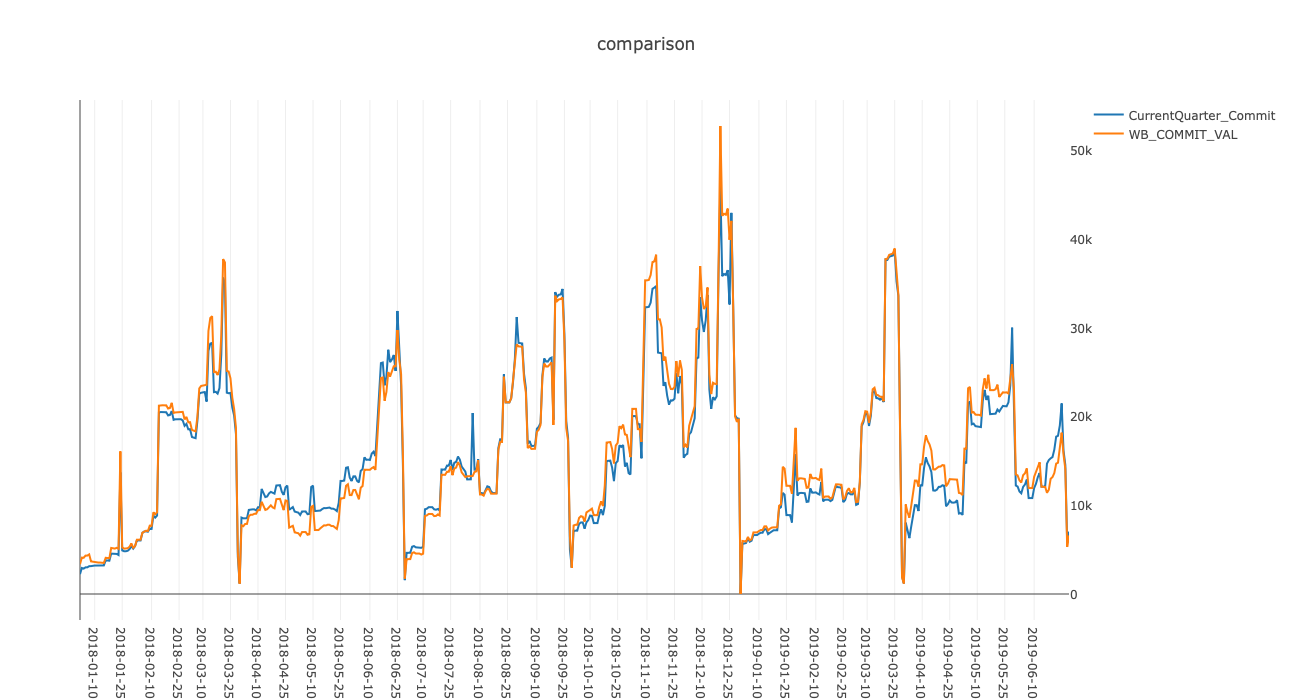

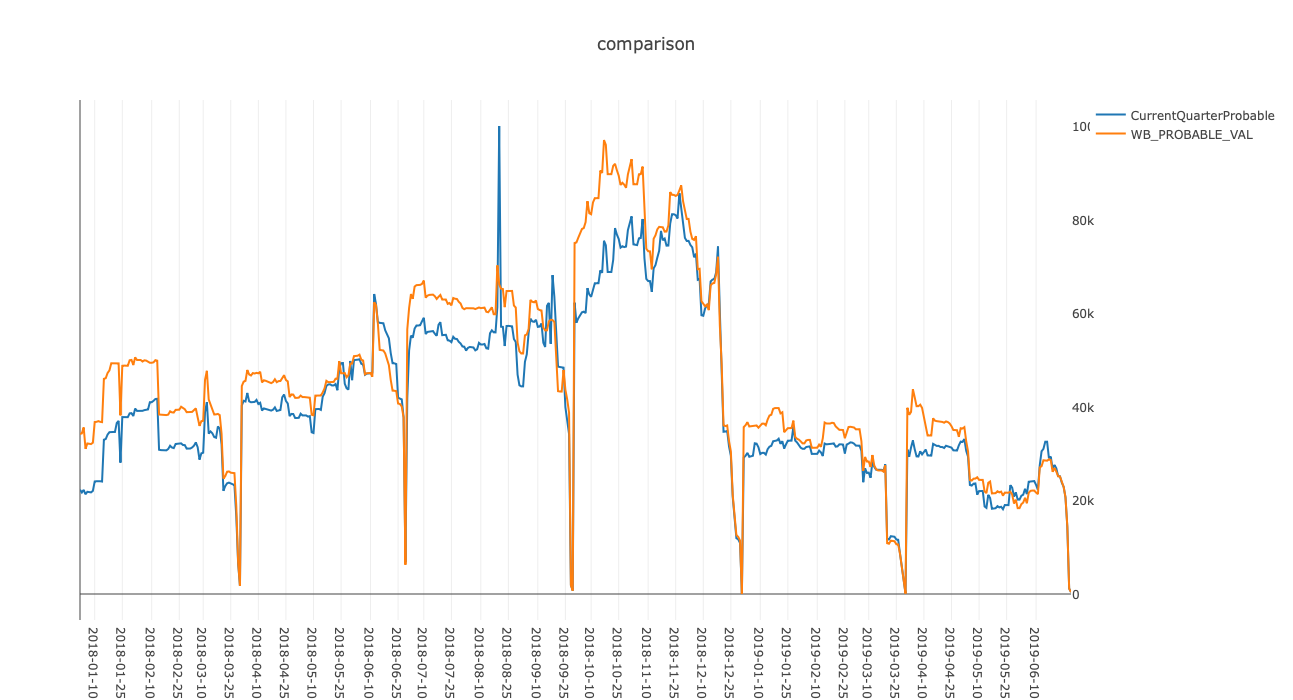

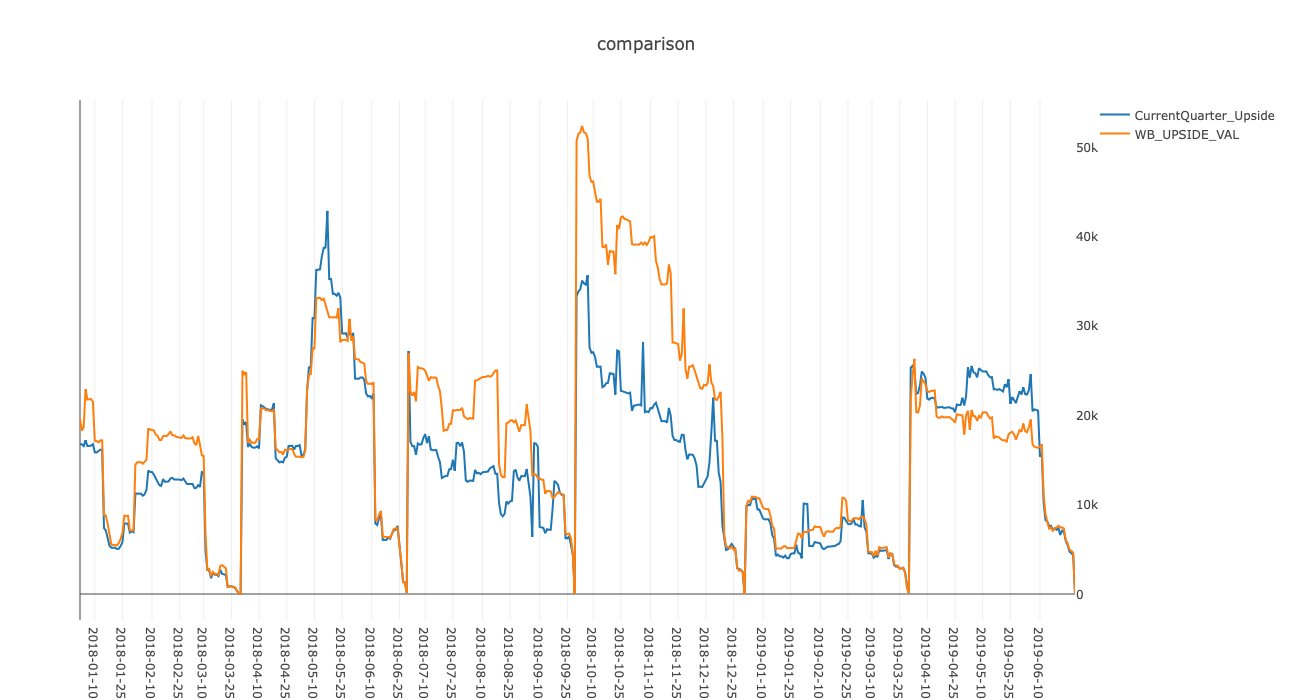

In [330]:
df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['CurrentQuarter_Commit', 'WB_COMMIT_VAL']
visulization_all(df, compares)


df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['CurrentQuarterProbable', 'WB_PROBABLE_VAL']
visulization_all(df, compares)


df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['CurrentQuarter_Upside', 'WB_UPSIDE_VAL']
visulization_all(df, compares)

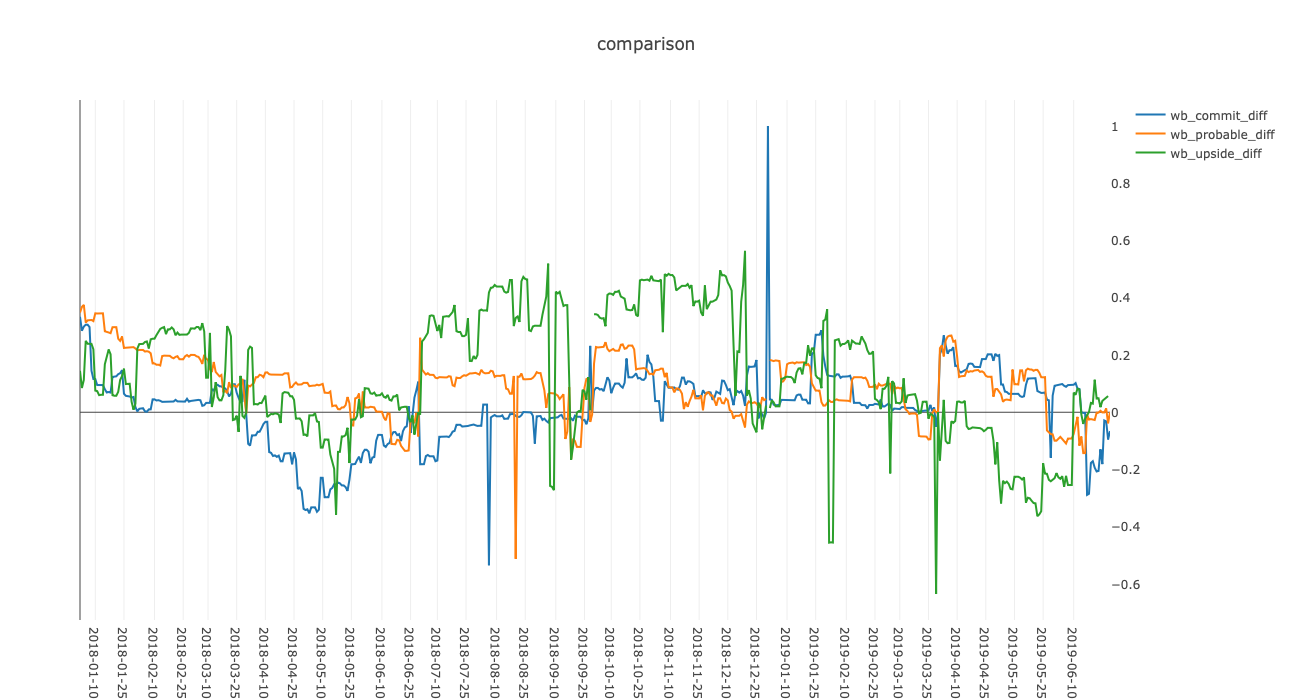

In [348]:
df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['wb_commit_diff', 'wb_probable_diff', 'wb_upside_diff']

visulization_all(df, compares)

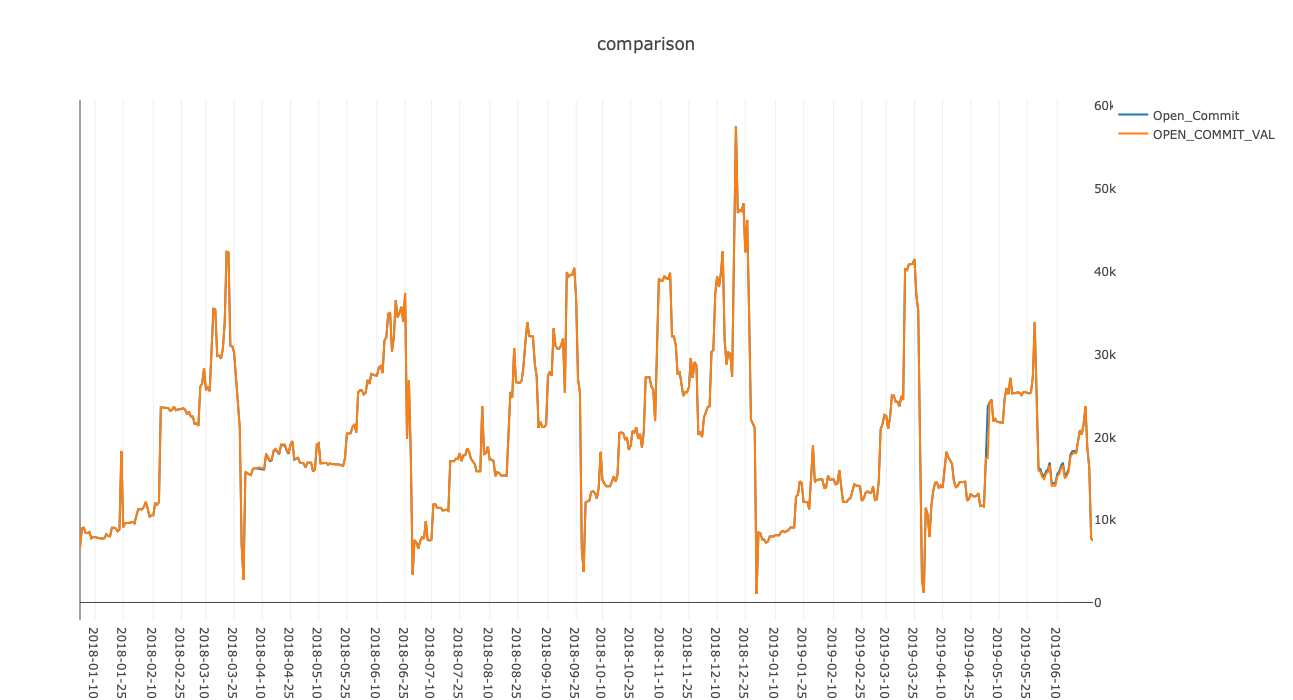

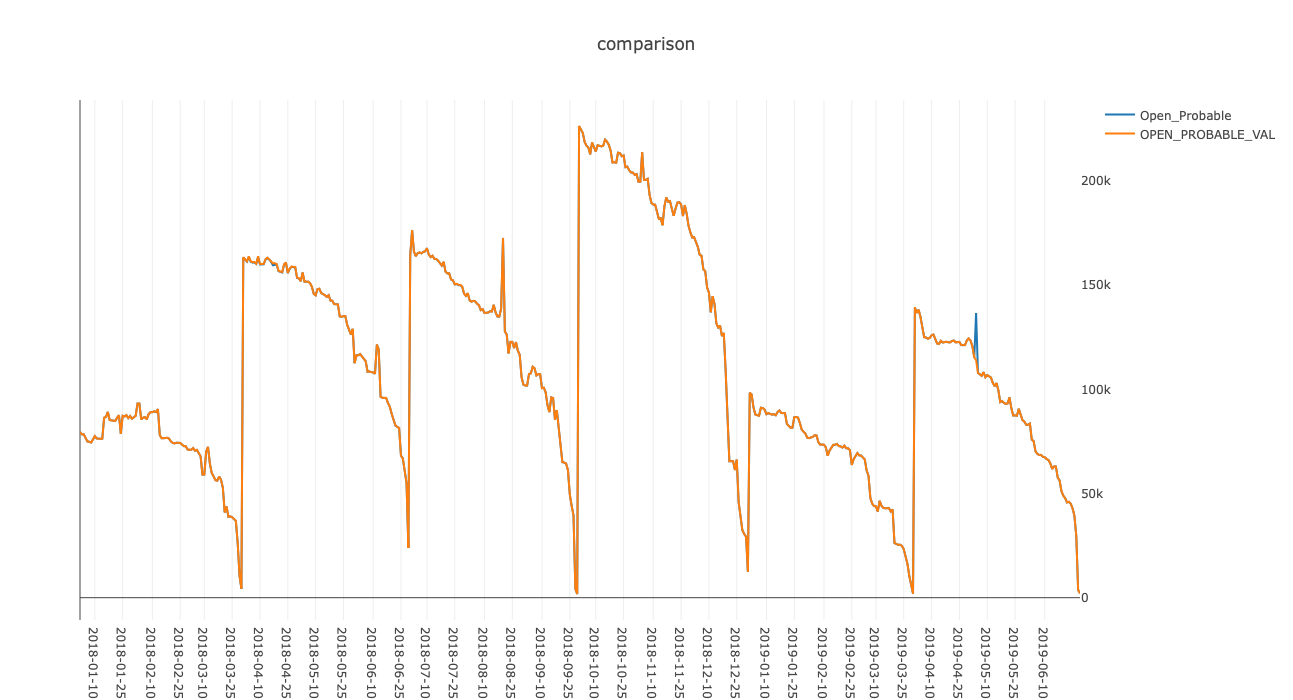

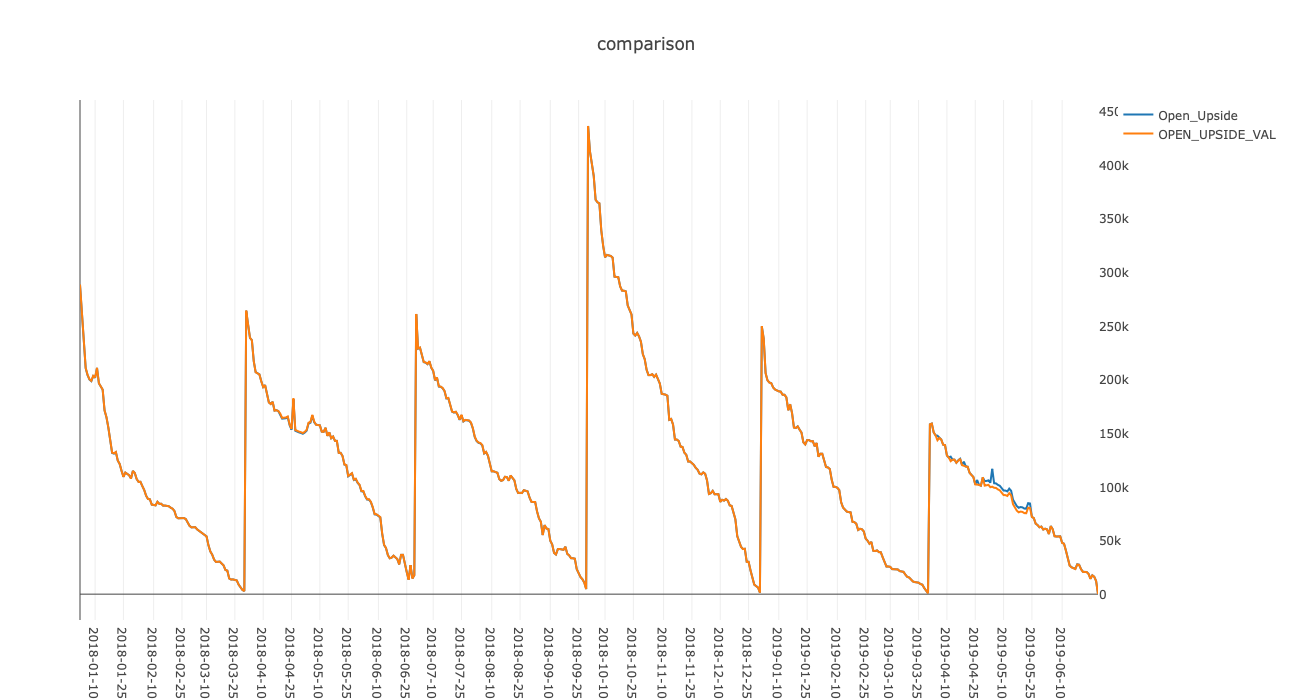

In [324]:
df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['Open_Commit', 'OPEN_COMMIT_VAL']
visulization_all(df, compares)


df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['Open_Probable', 'OPEN_PROBABLE_VAL']
visulization_all(df, compares)


df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['Open_Upside', 'OPEN_UPSIDE_VAL']
visulization_all(df, compares)

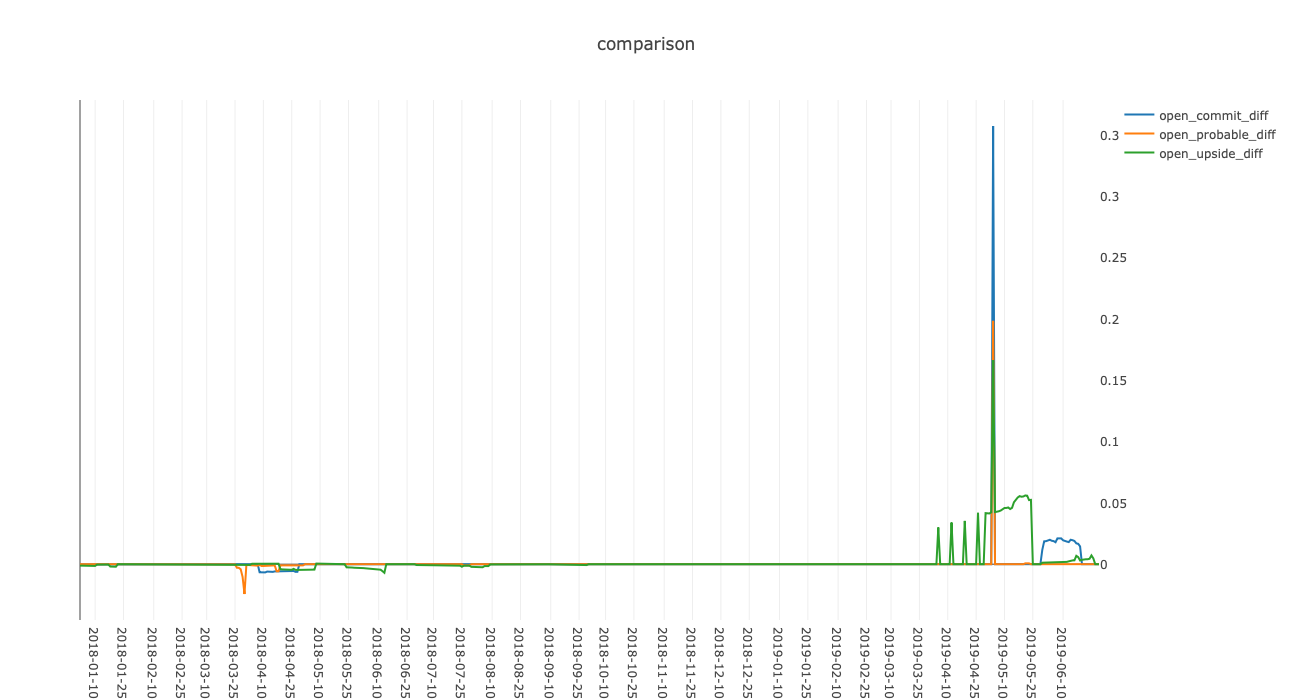

In [349]:
df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['open_commit_diff', 'open_probable_diff', 'open_upside_diff']

visulization_all(df, compares)

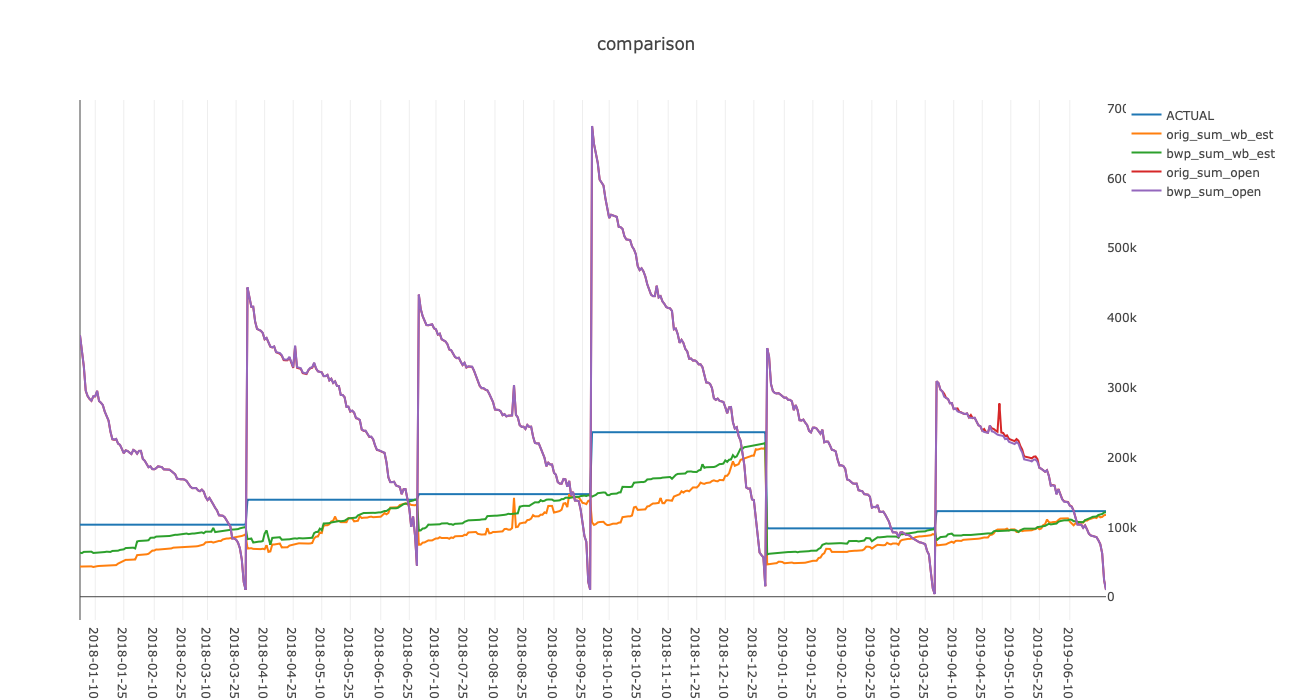

In [347]:
df = val_intersection[(val_intersection.GLOBAL_01_CODE=='AP')].reset_index(drop=True)
compares = ['ACTUAL', 'orig_sum_wb_est', 'bwp_sum_wb_est','orig_sum_open','bwp_sum_open']

visulization_all(df, compares)

## Finished